In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline
from scipy import stats

# Data

I will be working Major League Baseball data with two specific data sets, one being all historical batting data categorized by year and player. This data includes the year, player, player's team, hits, home runs, along with most of the common (and a few less common) baseball hitting statitics. 

The second data set includes data on a teams overall season, including team name, year, ballpark(s) played at, season length, hits, ERA, runs, division among others. This data set is mostly used to determine a teams annual success via win/loss record but I will be including other stats that may come into play such as ERA.

In [2]:
# Import data
teams = pd.read_csv('teams.csv')
batting = pd.read_csv('batting.csv')

# Keep it to modern (reliable) data
teams.drop(teams[(teams.yearID < 1950)].index, inplace=True)
batting.drop(batting[(batting.yearID < 1950)].index, inplace=True)

# Calculate the variable of interest
teams.insert(7,'win_p',teams['W']/teams['G'])

# Add categorical variables before grouping
batting.insert(5, 'LgWin',teams['LgWin'])

# Batting is by player, I need it grouped by team and year.
team_batting = batting.groupby(['yearID','teamID']).sum().reset_index()

# Calculate the batting average
team_batting.insert(5, 'avg',team_batting['H']/team_batting['AB'])

# Add winning percentage and a couple other variables of interest
team_win = teams.groupby(['yearID','teamID']).sum().reset_index()
team_batting.insert(2, 'win_p',team_win['win_p'])
team_batting.insert(3, 'RA',team_win['RA'])
team_batting.insert(4, 'ERA',team_win['ERA'])

In [5]:
team_batting.drop(['stint','G','AB','2B','3B','CS','IBB','HBP','SH','SF','GIDP','H','RA'], axis=1, inplace=True)

## Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. 

## Exploring the data: Univariate¶

In [6]:
team_batting.columns

Index(['yearID', 'teamID', 'win_p', 'ERA', 'avg', 'R', 'HR', 'RBI', 'SB', 'BB',
       'SO'],
      dtype='object')

Variables of interest: yearID, teamID, win_p, ERA, R, E, avg, 2B, 3B, HR, RBI, SB, BB, SO, 

In [7]:
team_batting.shape

(1682, 11)

Number of data points: 1682 rows x 22 columns

Variable Types:

    TeamID - Team Name - Categorical
    
    YearID - Year - Continuous - Interval
    
    win_p - Winning Percentage - Continuous - Ratio
    
    ERA - Earned Run Average - Continuous - Ratio
    
    R - Runs (for) - Continuous - Ratio
    
    E - Errors - Continuous - Ratio
    
    avg - Batting Average - Continuous - Ratio
    
    2B - Doubles - Continuous - Ratio
    
    3B - Triples - Continuous - Ratio
    
    HR - Home Runs - Continuous - Ratio
    
    RBI - Runs Batted In - Continuous - Ratio
    
    SB - Stolen Bases - Continuous - Ratio
    
    BB - Walks - Continuous - Ratio

In [8]:
team_batting.head()

,yearID,teamID,win_p,ERA,avg,R,HR,RBI,SB,BB,SO
0,1950,BOS,0.610390,4.88,0.301849,1027,161,974.0,32.0,719,580.0
1,1950,BRO,0.574194,4.28,0.272371,847,194,774.0,77.0,607,632.0
2,1950,BSN,0.532051,4.14,0.263099,785,148,726.0,71.0,615,616.0
3,1950,CHA,0.384615,4.41,0.260076,625,93,592.0,19.0,549,567.0
4,1950,CHN,0.415584,4.28,0.248184,643,161,615.0,46.0,479,767.0


In [9]:
team_batting.describe()

,yearID,win_p,ERA,avg,R,HR,RBI,SB,BB,SO
count,1682.000000,1682.000000,1682.000000,1682.000000,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,1987.247325,0.499439,4.002806,0.258755,701.41736,144.221760,660.774078,94.214625,523.145065,947.258621
std,18.837814,0.072653,0.581586,0.012728,97.24928,40.491377,95.574023,42.026928,76.499543,197.780665
min,1950.000000,0.248447,2.450000,0.214124,329.00000,32.000000,314.000000,13.000000,275.000000,379.000000
25%,1972.000000,0.448052,3.590000,0.250152,641.00000,114.000000,602.250000,64.000000,473.000000,818.000000
50%,1989.000000,0.500000,3.970000,0.259242,701.00000,142.000000,659.000000,90.000000,520.000000,934.000000
75%,2003.000000,0.552147,4.370000,0.267073,763.00000,171.000000,720.750000,120.000000,571.750000,1073.000000
max,2017.000000,0.716049,6.380000,0.301849,1027.00000,264.000000,974.000000,341.000000,775.000000,1571.000000


There seems to be a high variance with all but average.

## Exploring the data: Bivariate

## For two continuous variables:

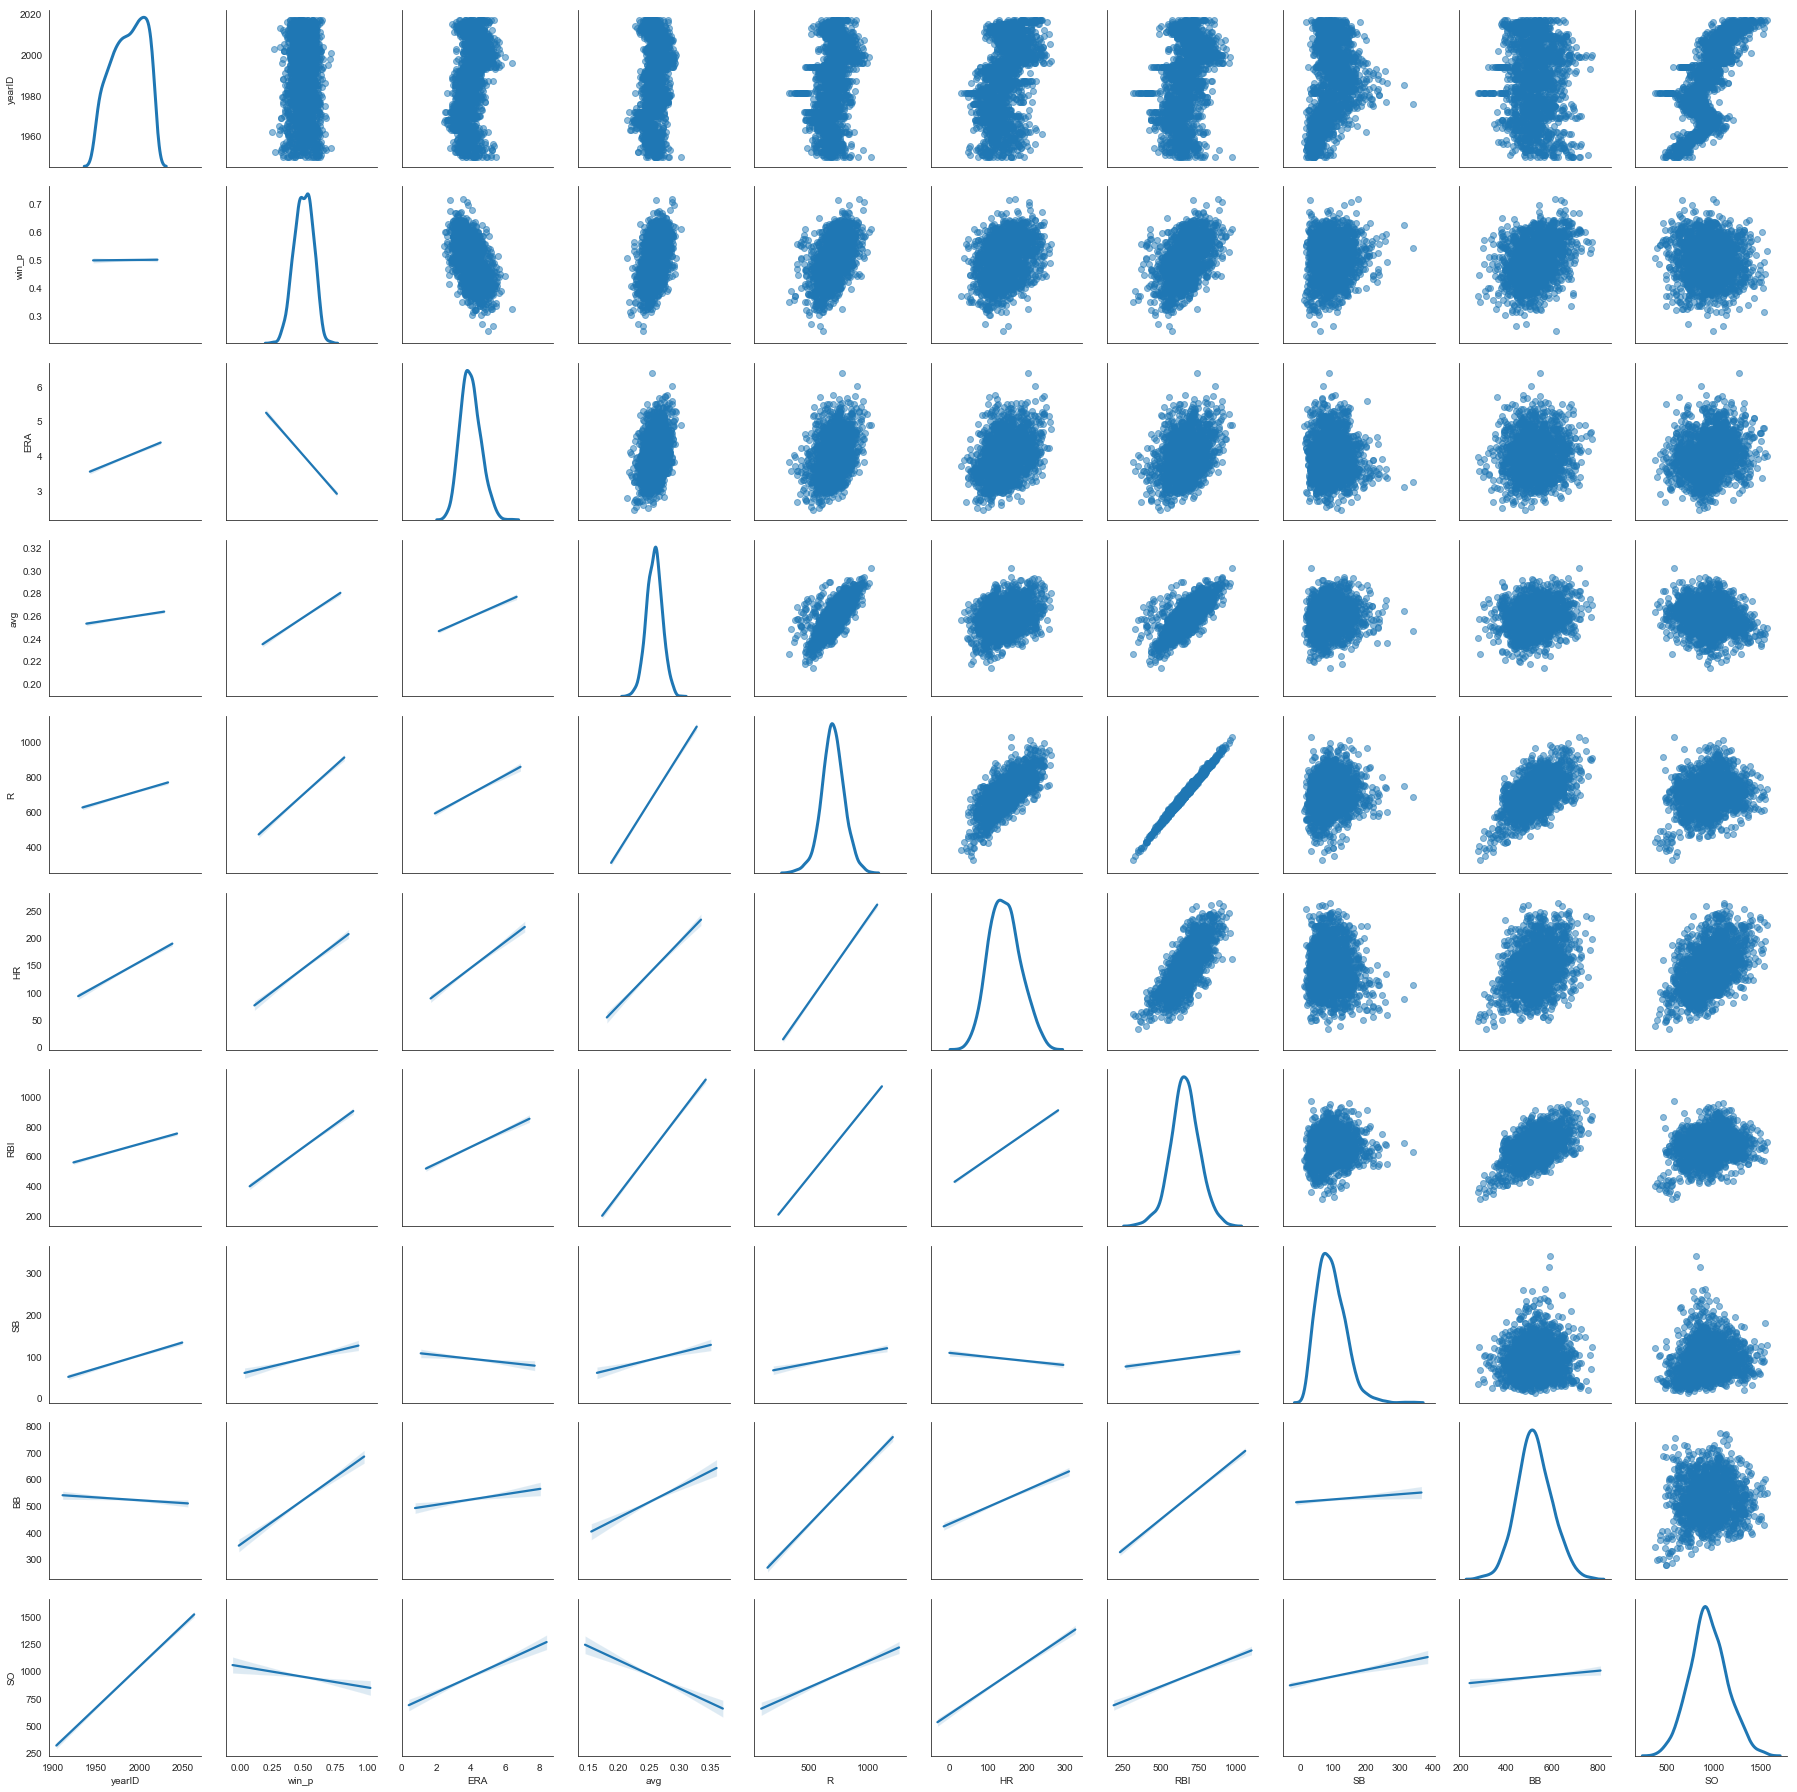

In [10]:
# Make the scatterplot matrix
# Set the default plot aesthetics.
sns.set_style("white")

# Take a subset of the data to make plots clearer.
matrix = team_batting

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(matrix.dropna(), diag_sharey=False)

# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)

# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)

plt.show()

#Some warnings will show up below because the plot does not include a legend.



          yearID     win_p       ERA       avg         R        HR       RBI  \
yearID  1.000000  0.008168  0.334249  0.176047  0.280813  0.414380  0.323025   
win_p   0.008168  1.000000 -0.522273  0.421986  0.483679  0.315668  0.471792   
ERA     0.334249 -0.522273  1.000000  0.307219  0.318330  0.343993  0.339439   
avg     0.176047  0.421986  0.307219  1.000000  0.723038  0.365430  0.720444   
R       0.280813  0.483679  0.318330  0.723038  1.000000  0.737999  0.995463   
HR      0.414380  0.315668  0.343993  0.365430  0.737999  1.000000  0.764199   
RBI     0.323025  0.471792  0.339439  0.720444  0.995463  0.764199  1.000000   
SB      0.282720  0.126229 -0.061783  0.109288  0.126629 -0.095077  0.107910   
BB     -0.052657  0.322061  0.075579  0.193940  0.584797  0.339234  0.570210   
SO      0.727932 -0.071149  0.213464 -0.167859  0.235959  0.492082  0.265958   

              SB        BB        SO  
yearID  0.282720 -0.052657  0.727932  
win_p   0.126229  0.322061 -0.071149  
ER

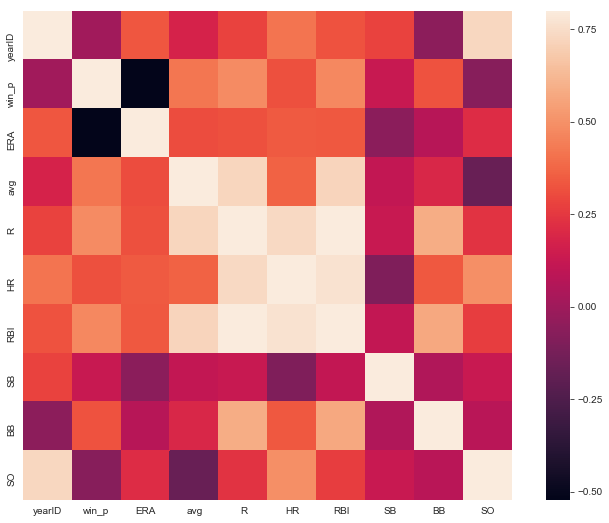

In [13]:
# Make the correlation matrix.
matrix = team_batting
corrmat = matrix.corr()

print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

## For a continuous and a categorical pair

Lost here! Thinking my data doesn't have a good cate

In [15]:
data_cond = team_batting.loc[(((team_batting['yearID'] == 1950)) | (team_batting['yearID'] == 2000)),
            ['win_p','ERA','avg', 'R', 'HR','RBI','SB','BB','SO']]

In [16]:
data_cond_long = data_cond
data_cond_long = pd.melt(data_cond_long, id_vars=['yearID'])

g = sns.FacetGrid(qb_cond_long, col="variable", size=5, aspect=.5)
g = g.map(sns.boxplot, "yearID", "value")

plt.show()

KeyError: 'yearID'